In [34]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time 

In [4]:
# Toy Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

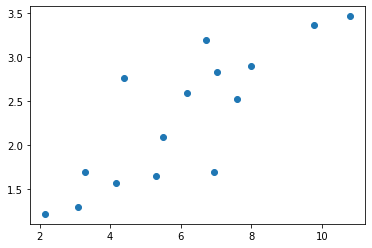

In [5]:
plt.scatter(x_train, y_train)

## Sklearn

In [16]:
linearModel = LinearRegression()

In [43]:
start = time.time()
linearModel.fit(x_train, y_train)

preds = linearModel.predict(x_train)

end = time.time()

print("Cost Time :", end - start)
print("Loss :",mean_squared_error(preds, y_train))

Cost Time : 0.0015740394592285156
Loss : 0.16891527


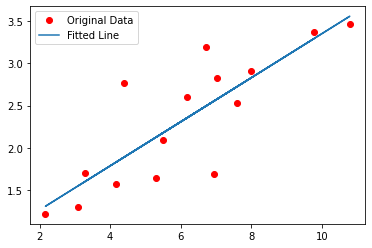

In [21]:
plt.plot(x_train, y_train, 'ro', label = "Original Data")
plt.plot(x_train, preds, label = "Fitted Line")
plt.legend()
plt.show()

## PyTorch

In [44]:
# Hyper Parameter
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [45]:
# Linear Regression Model
model = nn.Linear(input_size, output_size)

In [46]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [47]:
cost_time = []
# Train the Model
for epoch in range(num_epochs):
  start = time.time()
  # Convert nympy array to torch tensor
  inputs = torch.Tensor(x_train)
  targets = torch.Tensor(y_train)

  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  end = time.time()
  cost_time.append(end - start)
  if (epoch + 1) % 10 == 0:
    print('Epoch [{}/{}], Loss: {:.4f}, Time : {}'.format(epoch+1, num_epochs,loss.item(), end - start))


print("Cost Time : ", sum(cost_time))

Epoch [10/100], Loss: 1.7436, Time : 0.0002727508544921875
Epoch [20/100], Loss: 0.4305, Time : 0.0002541542053222656
Epoch [30/100], Loss: 0.2150, Time : 0.00025534629821777344
Epoch [40/100], Loss: 0.1796, Time : 0.00024008750915527344
Epoch [50/100], Loss: 0.1738, Time : 0.00025463104248046875
Epoch [60/100], Loss: 0.1728, Time : 0.0002582073211669922
Epoch [70/100], Loss: 0.1726, Time : 0.00025153160095214844
Epoch [80/100], Loss: 0.1726, Time : 0.0002701282501220703
Epoch [90/100], Loss: 0.1725, Time : 0.0002541542053222656
Epoch [100/100], Loss: 0.1725, Time : 0.0002949237823486328
Cost Time :  0.03250312805175781


In [48]:
# Plot the Graphs
predicted = model(torch.from_numpy(x_train)).detach().numpy()

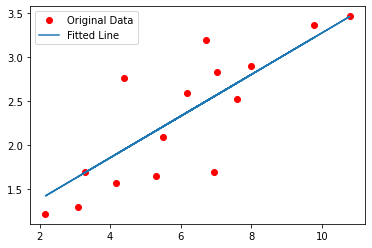

In [49]:
plt.plot(x_train, y_train, 'ro', label = "Original Data")
plt.plot(x_train, predicted, label = "Fitted Line")
plt.legend()
plt.show()

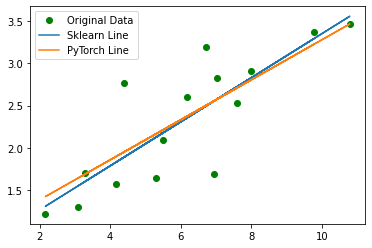

In [50]:
plt.plot(x_train, y_train, 'go', label = "Original Data")
plt.plot(x_train, preds, label = "Sklearn Line")
plt.plot(x_train, predicted, label = "PyTorch Line")

plt.legend()
plt.show()